# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [14]:
# A + B

In [15]:
# A * B

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [24]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
df.columns

Index(['variace', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


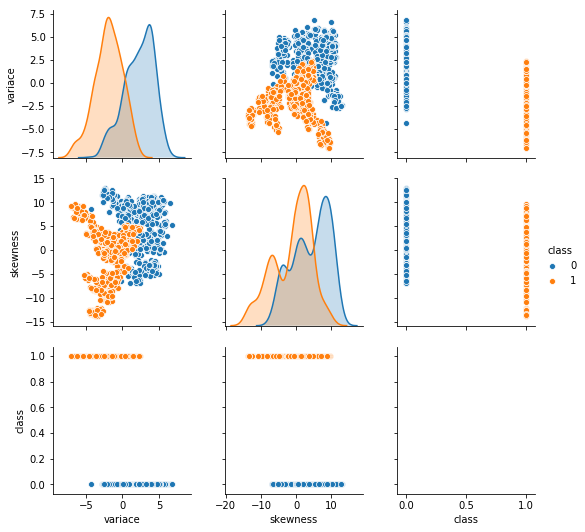

In [30]:
import seaborn as sns
sns.pairplot(df[["variace", "skewness", "class"]], hue="class")

#### Baseline model

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [32]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [34]:
model = RandomForestClassifier(n_estimators=20)
cross_val_score(model, X, y, cv=5)

array([0.99636364, 0.99272727, 0.98540146, 0.99270073, 0.99635036])

### Logistic Regression Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [36]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [37]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,)
result = model.evaluate(X_test, y_test,  verbose=0)

Train on 960 samples
Epoch 1/10
960/960 [==============================] - 1s 769us/sample - loss: 0.4406 - accuracy: 0.8604
Epoch 2/10
960/960 [==============================] - 0s 67us/sample - loss: 0.4256 - accuracy: 0.8719
Epoch 3/10
960/960 [==============================] - 0s 57us/sample - loss: 0.4122 - accuracy: 0.8781
Epoch 4/10
960/960 [==============================] - 0s 60us/sample - loss: 0.4000 - accuracy: 0.8802
Epoch 5/10
960/960 [==============================] - 0s 55us/sample - loss: 0.3889 - accuracy: 0.8865
Epoch 6/10
960/960 [==============================] - 0s 67us/sample - loss: 0.3787 - accuracy: 0.8896
Epoch 7/10
960/960 [==============================] - 0s 65us/sample - loss: 0.3693 - accuracy: 0.8896
Epoch 8/10
960/960 [==============================] - 0s 63us/sample - loss: 0.3606 - accuracy: 0.8969
Epoch 9/10
960/960 [==============================] - 0s 68us/sample - loss: 0.3524 - accuracy: 0.8979
Epoch 10/10
960/960 [==============================

In [38]:
historydf = pd.DataFrame(history.history, index=history.epoch)

In [39]:
historydf

,loss,accuracy
0,0.440589,0.860417
1,0.425635,0.871875
2,0.412202,0.878125
3,0.400012,0.880208
4,0.388933,0.886458
5,0.378744,0.889583
6,0.369304,0.889583
7,0.360554,0.896875
8,0.352404,0.897917
9,0.344751,0.906250


Text(0.5, 1.0, 'Test accuracy: 89.1 %')

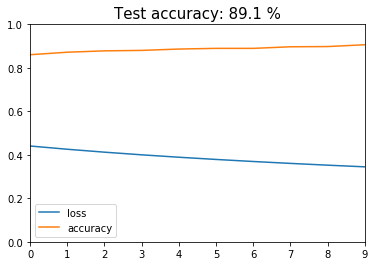

In [40]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [41]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [42]:
historydf = pd.concat(dflist, axis=1)

In [43]:
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,0.972987,0.242708,0.835544,0.377083,0.324847,0.962500,0.343676,0.848958
1,0.787437,0.390625,0.558116,0.696875,0.217795,0.961458,0.139050,0.960417
2,0.662258,0.603125,0.439595,0.785417,0.181513,0.962500,0.099765,0.971875
3,0.576585,0.727083,0.366392,0.838542,0.158994,0.965625,0.082914,0.973958
4,0.515326,0.827083,0.314756,0.884375,0.142798,0.968750,0.073246,0.976042
5,0.469786,0.889583,0.276289,0.909375,0.130704,0.968750,0.066400,0.979167
6,0.434616,0.910417,0.246706,0.926042,0.121091,0.968750,0.061900,0.980208
7,0.406626,0.914583,0.223294,0.939583,0.113341,0.969792,0.058211,0.981250
8,0.383651,0.918750,0.204406,0.947917,0.106909,0.971875,0.055565,0.981250
9,0.364357,0.925000,0.188879,0.954167,0.101541,0.973958,0.053085,0.981250


In [44]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [45]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.972987  0.242708  0.835544  0.377083  0.324847  0.962500   
1              0.787437  0.390625  0.558116  0.696875  0.217795  0.961458   
2              0.662258  0.603125  0.439595  0.785417  0.181513  0.962500   
3              0.576585  0.727083  0.366392  0.838542  0.158994  0.965625   
4              0.515326  0.827083  0.314756  0.884375  0.142798  0.968750   
5              0.469786  0.889583  0.276289  0.909375  0.130704  0.968750   
6              0.434616  0.910417  0.246706  0.926042  0.121091  0.968750   
7              0.406626  0.914583  0.223294  0.939583  0.113341  0.969792   
8              0.383651  0.918750  0.204406  0.947917  0.106909  0.971875   
9              0.364357  0.925000  0.188879  0.954167  0.101541  0.973958   
10             0.347781  0.925000  0.175983  0.957292  0.096880  0.973958   
11             0.333354  0.933333  0.165162  0.959375  0.092878  0.975000   
12             0.320586  0.936458  0.155806  0.960417  0.089371  0.975000   
13             0.309173  0.942708  0.147745  0.965625  0.086342  0.975000   
14             0.298849  0.940625  0.140722  0.965625  0.083607  0.976042   
15             0.289491  0.939583  0.134604  0.966667  0.081139  0.977083   

learning_rate      0.50            
metric             loss  accuracy  
0              0.343676  0.848958  
1              0.139050  0.960417  
2              0.099765  0.971875  
3              0.082914  0.973958  
4              0.073246  0.976042  
5              0.066400  0.979167  
6              0.061900  0.980208  
7              0.058211  0.981250  
8              0.055565  0.981250  
9              0.053085  0.981250  
10             0.051151  0.981250  
11             0.049469  0.981250  
12             0.047983  0.981250  
13             0.046714  0.981250  
14             0.045516  0.981250  
15             0.044696  0.981250

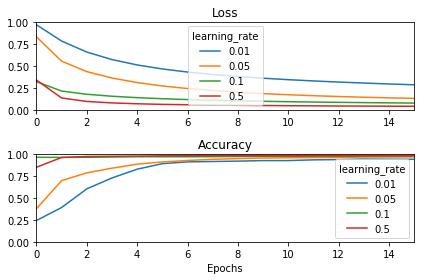

In [46]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [47]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [48]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [49]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.495841  0.805208  1.326829  0.269792  0.581624  0.743750   
1           0.462296  0.841667  1.155767  0.279167  0.568759  0.750000   
2           0.434924  0.854167  1.005759  0.298958  0.556862  0.759375   
3           0.412102  0.866667  0.878682  0.341667  0.545846  0.767708   
4           0.392606  0.868750  0.774431  0.427083  0.535546  0.773958   
5           0.375612  0.877083  0.691207  0.560417  0.525925  0.772917   
6           0.360584  0.881250  0.625809  0.693750  0.516900  0.781250   
7           0.347153  0.889583  0.574298  0.812500  0.508380  0.786458   
8           0.334995  0.902083  0.533209  0.888542  0.500374  0.795833   
9           0.323919  0.904167  0.499974  0.926042  0.492763  0.802083   
10          0.313780  0.912500  0.472643  0.935417  0.485565  0.802083   
11          0.304388  0.914583  0.449642  0.937500  0.478704  0.810417   
12          0.295691  0.913542  0.430038  0.939583  0.472152  0.813542   
13          0.287590  0.916667  0.413050  0.942708  0.465898  0.819792   
14          0.280007  0.917708  0.398145  0.939583  0.459919  0.822917   
15          0.272899  0.921875  0.384937  0.937500  0.454172  0.826042   
16          0.266190  0.926042  0.373116  0.937500  0.448654  0.830208   
17          0.259885  0.926042  0.362433  0.938542  0.443329  0.835417   
18          0.253924  0.927083  0.352689  0.941667  0.438210  0.837500   
19          0.248266  0.932292  0.343818  0.941667  0.433269  0.839583   

batch_size       128            
metric          loss  accuracy  
0           0.826951  0.345833  
1           0.801468  0.357292  
2           0.777155  0.383333  
3           0.754702  0.413542  
4           0.733444  0.443750  
5           0.713238  0.487500  
6           0.694439  0.541667  
7           0.676564  0.609375  
8           0.659893  0.660417  
9           0.643923  0.705208  
10          0.629036  0.744792  
11          0.615033  0.769792  
12          0.601813  0.806250  
13          0.589282  0.848958  
14          0.577449  0.862500  
15          0.566348  0.871875  
16          0.555763  0.876042  
17          0.545770  0.884375  
18          0.536257  0.896875  
19          0.527312  0.912500

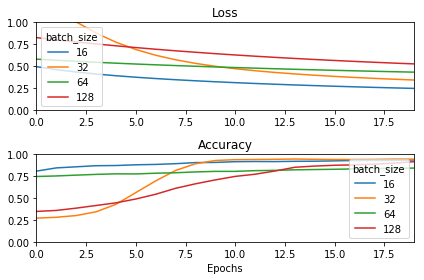

In [50]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [74]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [75]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [76]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

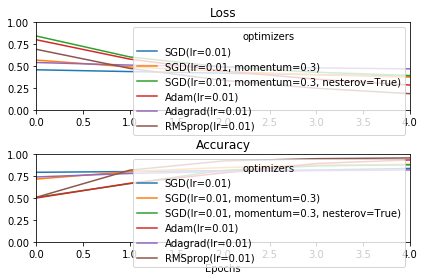

In [78]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [79]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [80]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

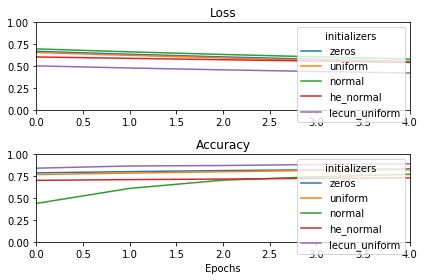

In [81]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [83]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test, verbose=0)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 1s 761us/sample - loss: 0.6385 - accuracy: 0.6994 - val_loss: 0.5582 - val_accuracy: 0.7951
Epoch 2/20
672/672 [==============================] - 0s 86us/sample - loss: 0.4379 - accuracy: 0.8646 - val_loss: 0.3975 - val_accuracy: 0.8785
Epoch 3/20
672/672 [==============================] - 0s 84us/sample - loss: 0.3126 - accuracy: 0.9226 - val_loss: 0.2821 - val_accuracy: 0.9618
Epoch 4/20
672/672 [==============================] - 0s 81us/sample - loss: 0.2257 - accuracy: 0.9643 - val_loss: 0.2019 - val_accuracy: 0.9757
Epoch 5/20
672/672 [==============================] - 0s 86us/sample - loss: 0.1638 - accuracy: 0.9762 - val_loss: 0.1458 - val_accuracy: 0.9826
Epoch 6/20
672/672 [==============================] - 0s 89us/sample - loss: 0.1231 - accuracy: 0.9807 - val_loss: 0.1119 - val_accuracy: 0.9861
Epoch 7/20
672/672 [==============================] - 0s 92us/sample - loss: 0.0973

In [84]:
result

[0.03363971397714707, 0.9878641]

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.layers

In [87]:
inp = model.layers[0].input
out = model.layers[0].output

In [88]:
inp

<tf.Tensor 'dense_input:0' shape=(None, 4) dtype=float32>

In [89]:
out

<tf.Tensor 'dense/Identity:0' shape=(None, 2) dtype=float32>

In [90]:
features_function = K.function([inp], [out])

In [91]:
features_function

In [92]:
features_function([X_test])[0].shape

(412, 2)

In [93]:
features = features_function([X_test])[0]

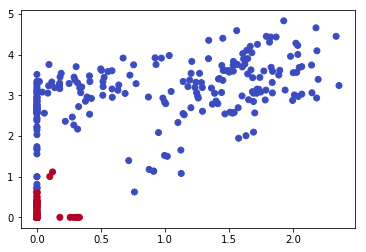

In [94]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [95]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

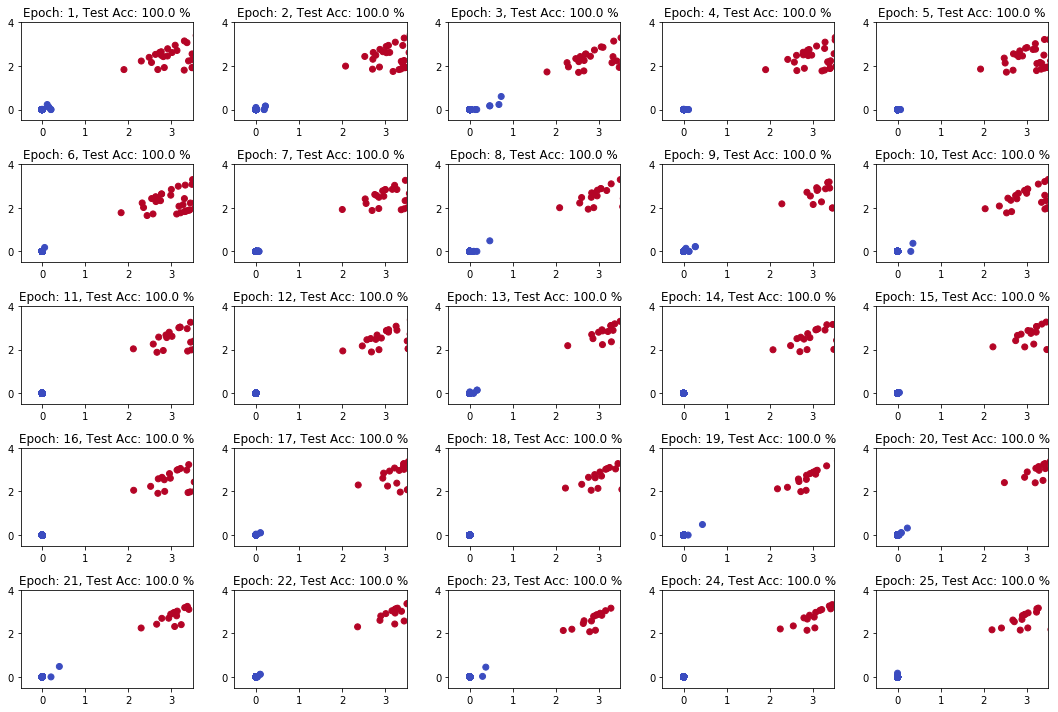

In [97]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [65]:
data = pd.read_csv("../data/wines.csv")
data.dtypes

Class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280-OD315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [64]:
data.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [62]:
data.groupby(["Class"]).count()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
Class,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48


/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


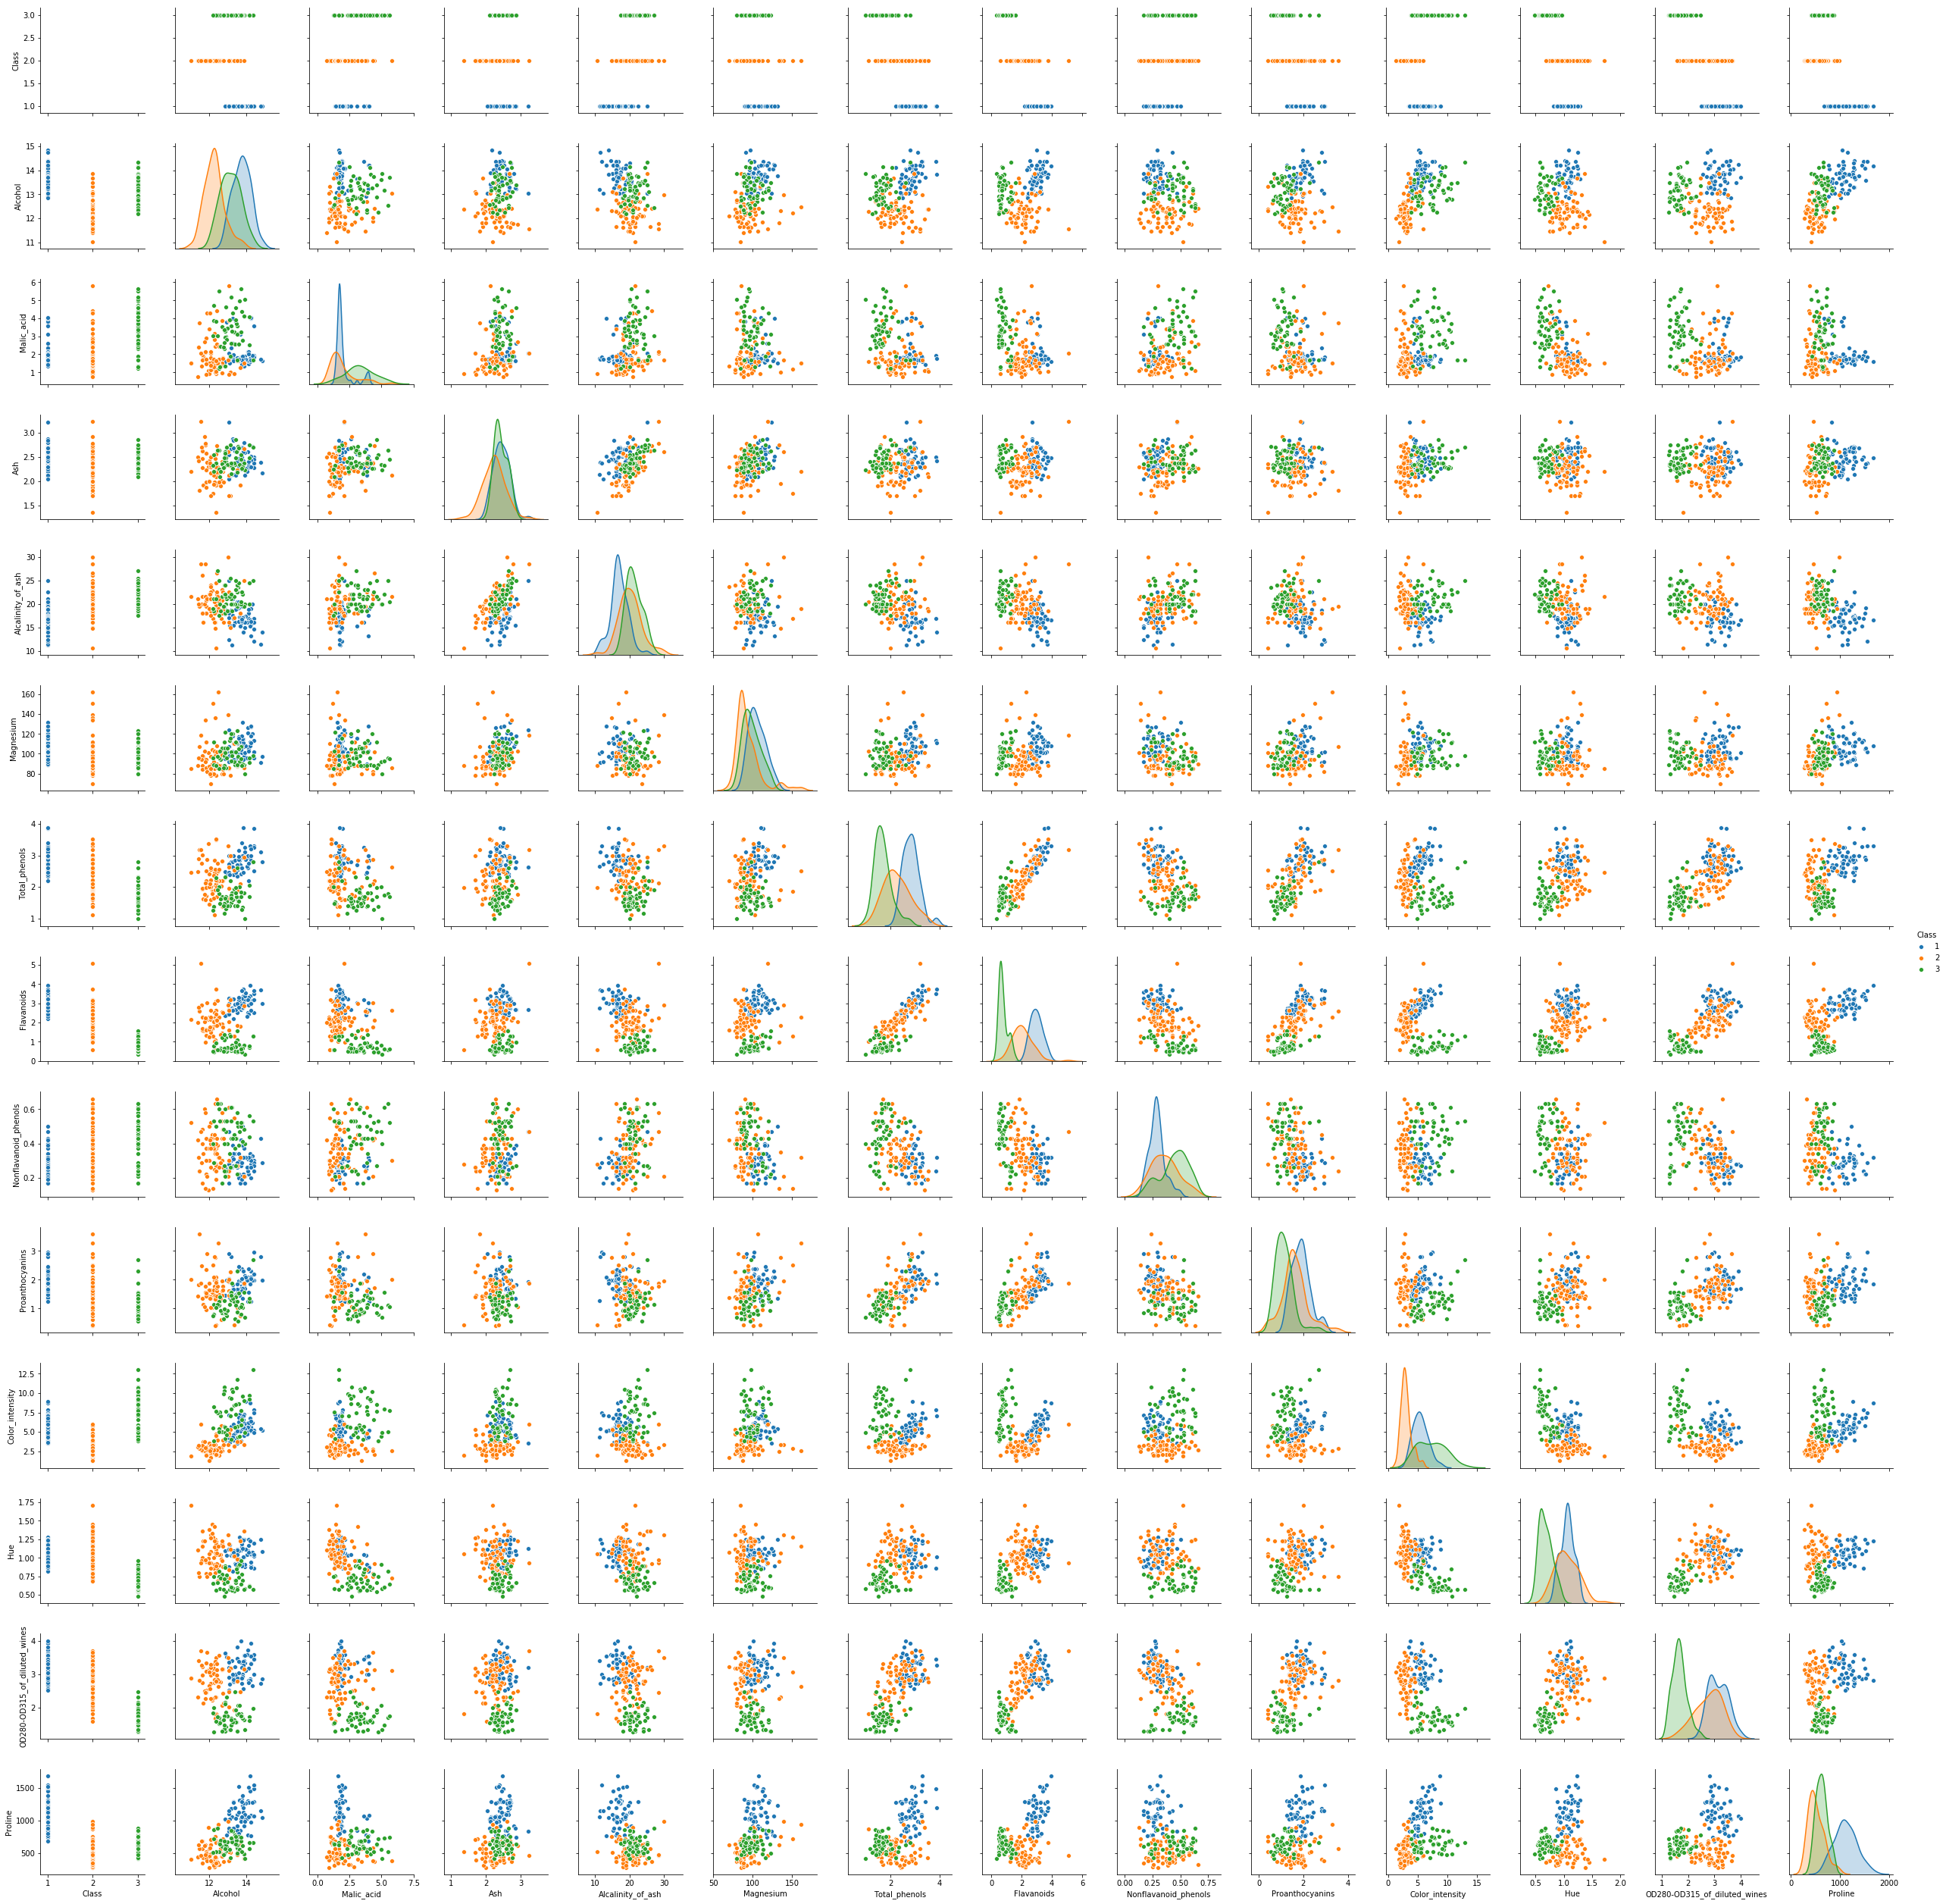

In [63]:
sns.pairplot(data, hue="Class")

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard